# 📈 Exploratory Data Analysis

## Add data:  ubiquant-parquet 

## Load libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

import seaborn as sns
from tqdm import tqdm
import os
import random



## Load data from ubiquant-parquet and sort by investment ID followed by time ID

In [2]:
df_train = pd.read_parquet('../input/ubiquant-parquet/train_low_mem.parquet')
df_train = df_train.sort_values(by=['investment_id','time_id'])

## Inspect dataframe

In [3]:
print('number of unnique investment IDs',len(df_train.investment_id.unique()))
print('number of unique time IDs',len(df_train.time_id.unique()))

df_train.head()

number of unnique investment IDs 3579
number of unique time IDs 1211


row_id  time_id  investment_id    target       f_0       f_1  f_2  \
1711316  757_0      757              0  0.066664  1.188115  4.222316  0.0   
1714085  758_0      758              0  2.788548  1.124336  4.151623  0.0   
1716869  759_0      759              0 -3.844462  1.112007  3.846268  0.0   
1719651  760_0      760              0 -3.304178  1.138571  3.549768  0.0   
1722426  761_0      761              0 -3.440455  0.988404  2.754384  0.0   

              f_3       f_4       f_5  ...     f_290     f_291     f_292  \
1711316  7.042030  1.006562 -0.106670  ... -2.039460  0.449313 -1.306017   
1714085  6.618785  0.981486 -1.685877  ... -1.807204  0.582957 -0.896639   
1716869  6.281942  0.948479 -1.814978  ... -0.985501  1.045337  0.213021   
1719651  6.268737  1.047803 -2.124201  ... -1.522761  0.728089  3.173257   
1722426  5.847007  0.919070 -2.143898  ...  0.750976 -0.840846  3.079106   

            f_293     f_294     f_295     f_296     f_297  f_298     f_299  
1711316  0.102117  0.860582  9.245561  1.119834  1.128593    0.0 -0.733478  
1714085  0.115408  0.916387  4.294172  1.236234  0.424175    0.0 -0.736736  
1716869  0.198558 -1.068690  1.208212 -0.910962  0.169104    0.0 -0.730020  
1719651  0.149934  0.657624  1.237572  0.026174  0.678217    0.0 -0.706821  
1722426  0.127343  1.262858  2.195298 -0.100932 -1.098608    0.0 -0.747978  

[5 rows x 304 columns]

## Distribution of time IDs

In [4]:
num_time_ids = [len(df_train.loc[df_train.investment_id==inv_id]) for inv_id in df_train.investment_id.unique()]

print('Minimum number of time_ids for an investment = ',min(num_time_ids))
print('Maximum number of time_ids for an investment = ',max(num_time_ids))
print('Mean number of time_ids = ',round(np.mean(num_time_ids)))

Minimum number of time_ids for an investment =  2
Maximum number of time_ids for an investment =  1211
Mean number of time_ids =  878


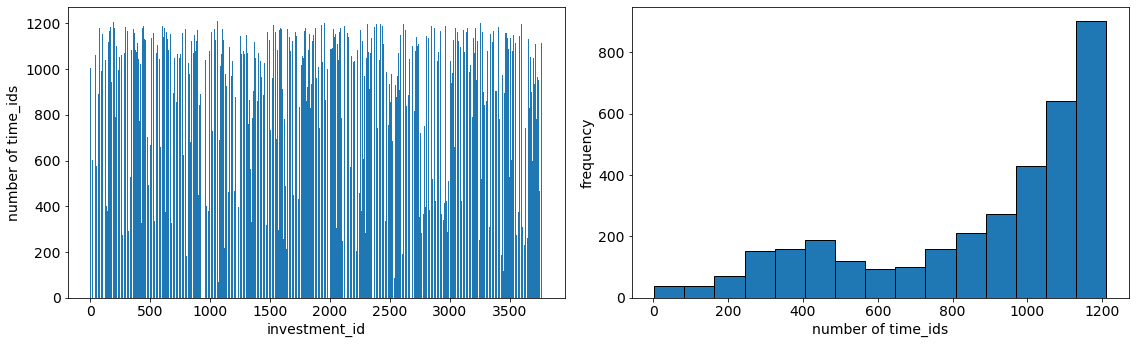

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].bar(df_train.investment_id.unique(),num_time_ids)
ax[0].set_xlabel('investment_id')
ax[0].set_ylabel('number of time_ids')


ax[1].hist(num_time_ids, bins = 15,edgecolor="k")
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('number of time_ids')

plt.tight_layout()

## Select a random investment_id and investigate the autocorrelation and partial autocorrelation for a chosen "target"

In [6]:
target = 'target' #'f_100'

number of time_ids =  1201


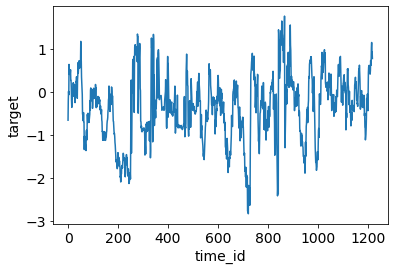

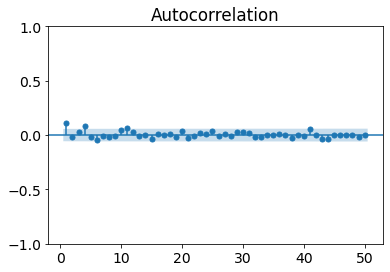

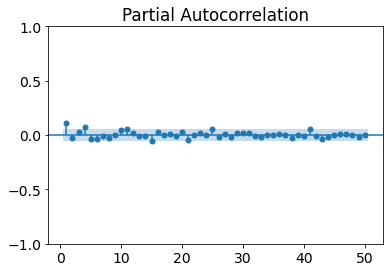

In [7]:
#print([i for i in range(len(num_time_ids)) if num_time_ids[i] >1200])
inv_ids = df_train.investment_id.unique()
inv_id = inv_ids[107]

# inv_id = random.choice(df_train.investment_id.unique())
print('number of time_ids = ',len(df_train.loc[df_train.investment_id==inv_id]))

plt.plot(df_train.time_id.loc[df_train.investment_id==inv_id],df_train.f_2.loc[df_train.investment_id==inv_id])
plt.xlabel('time_id')
plt.ylabel(target)
plt.show()

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 

plot_acf(df_train[target].loc[df_train.investment_id==inv_id].to_numpy(), lags=50, zero = False)#
plt.show()

plot_pacf(df_train[target].loc[df_train.investment_id==inv_id].to_numpy(), lags=50,  method='ywm', zero = False)#
plt.show()

## Create a new dataframe containing only investment IDs, time IDs and the chosen "target"

In [8]:
df_new = df_train[['investment_id','time_id',target]].pivot(index='time_id', columns ='investment_id', values=target)
df_new.head()

investment_id  0         1         2     3     4         6         7     \
time_id                                                                   
0               NaN -0.300875 -0.231040   NaN   NaN  0.568807 -1.064780   
1               NaN -0.917045 -0.472108   NaN   NaN -0.147971 -0.372692   
2               NaN -0.480234 -0.661659   NaN   NaN  0.243674  0.318899   
3               NaN -0.323562 -0.055215   NaN   NaN  1.816745 -0.711446   
4               NaN  2.494479  0.341267   NaN   NaN  0.470476 -1.581650   

investment_id      8         9         10    ...  3763  3764      3765  \
time_id                                      ...                         
0             -0.531940  1.505904 -0.260731  ...   NaN   NaN  0.302557   
1             -0.105693  0.622500 -0.400038  ...   NaN   NaN -0.560079   
2             -0.260137 -0.610705 -1.030857  ...   NaN   NaN -0.305467   
3             -0.640987  5.271096 -0.636719  ...   NaN   NaN -0.730791   
4             -0.592970       NaN -0.435524  ...   NaN   NaN -0.656495   

investment_id      3766      3767      3768      3769      3770      3772  \
time_id                                                                     
0              0.003156       NaN -0.392297 -0.877746 -0.284696  0.202003   
1              0.250396  1.318857 -0.227782 -0.684049 -0.894825 -0.286612   
2              2.031675 -0.040981 -0.018971 -0.250995 -0.323800  0.300915   
3              0.857357  0.386379 -0.708491 -0.165561  0.836601  0.076417   
4              1.897659 -1.476258 -0.210125 -0.206145  0.126859 -0.387297   

investment_id  3773  
time_id              
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 3579 columns]

## Visulize data avaliable at diffent time IDs

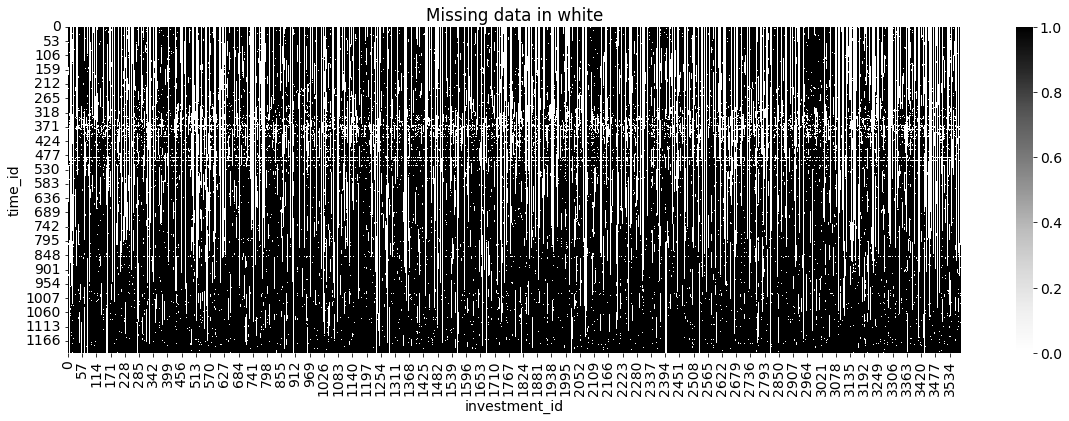

In [9]:
plt.figure(figsize=(20,6))

ax = sns.heatmap(1-np.isnan(df_new.to_numpy()), cmap="Greys")

plt.title('Missing data in white')
plt.xlabel('investment_id')
plt.ylabel('time_id')

plt.show()

## Drop all time IDs except the most recent time IDs and visulize missing data

Number of time ids kept =  55


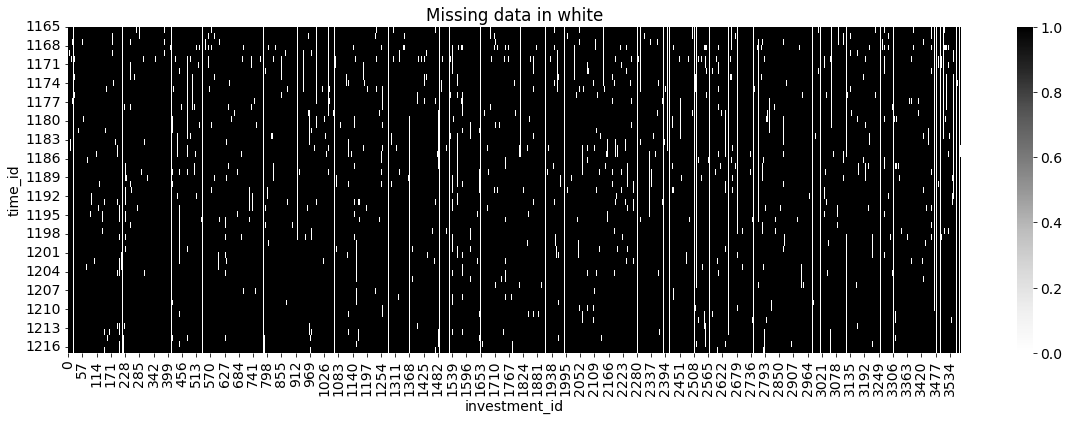

investment_id      0         1         2         3         4         6     \
time_id                                                                     
1165          -0.126161 -0.236954  0.042999 -1.828676 -0.025874 -0.462436   
1166          -1.422224  0.451613  0.222839  0.832755 -1.155375  0.533991   
1167           0.782584 -0.248490  0.473815  0.974139 -0.662639  1.603133   
1168           0.404876 -0.515872  0.031883  2.471336  0.028764  3.181355   
1169          -0.565283  0.500246 -0.725813  0.721590  2.034239       NaN   

investment_id  7         8         9         10    ...      3763      3764  \
time_id                                            ...                       
1165            NaN  1.977578 -1.201739 -0.429568  ... -1.495710  0.993052   
1166            NaN  1.091279 -0.640289 -0.815561  ...  0.379351  0.058019   
1167            NaN  0.355666 -0.196654  0.155338  ...  1.923637  0.625204   
1168            NaN  0.020670  0.443744 -0.014791  ...  0.353180  2.111183   
1169            NaN  0.267856  0.850079 -0.154631  ...  0.557360  0.605266   

investment_id      3765      3766  3767      3768      3769      3770  \
time_id                                                                 
1165          -0.243761 -0.811874   NaN  0.052534  1.727537 -0.143206   
1166          -0.445746 -0.072000   NaN  0.148828  0.251668  0.818988   
1167          -0.643704  0.288524   NaN  0.046428 -0.275380  0.505010   
1168          -1.037552  0.375572   NaN  0.210745 -1.267997  0.466106   
1169          -0.028713  0.017552   NaN  0.025974  0.040529 -0.164254   

investment_id      3772      3773  
time_id                            
1165           0.029508 -1.545607  
1166          -0.450060 -0.855309  
1167           0.072966  2.043235  
1168          -0.179662 -0.534352  
1169           0.332268 -0.509292  

[5 rows x 3579 columns]

In [10]:
# Vary the range to drop more or less time IDs, eg. range(0,1156) -> range(0,900)
df_time_drop=df_new.drop(df_new.index[range(0,1156)])
print('Number of time ids kept = ',len(df_time_drop))

plt.figure(figsize=(20,6))
ax = sns.heatmap(1-np.isnan(df_time_drop.to_numpy()), cmap="Greys")

plt.title('Missing data in white')
plt.xlabel('investment_id')
plt.ylabel('time_id')
plt.yticks(np.linspace(0,54,18),df_time_drop.index[:-1:3])

plt.show()

df_time_drop.head()

## Drop investment IDs with more than N_missing missing time IDs and visulize new dataframe

In [11]:
N_missing = 10
df_time_drop = df_time_drop.dropna(thresh=len(df_time_drop)-N_missing, axis=1)#len(df_time_drop)-500
print('Number of investment_ids dropped = ',len(df_new.columns) - len(df_time_drop.columns))

Number of investment_ids dropped =  216


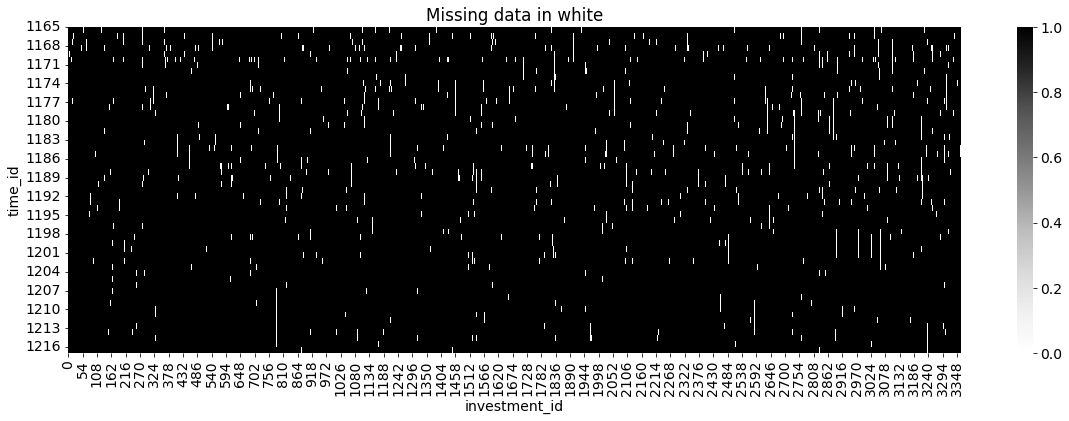

investment_id      0         1         2         3         4         6     \
time_id                                                                     
1165          -0.126161 -0.236954  0.042999 -1.828676 -0.025874 -0.462436   
1166          -1.422224  0.451613  0.222839  0.832755 -1.155375  0.533991   
1167           0.782584 -0.248490  0.473815  0.974139 -0.662639  1.603133   
1168           0.404876 -0.515872  0.031883  2.471336  0.028764  3.181355   
1169          -0.565283  0.500246 -0.725813  0.721590  2.034239       NaN   

investment_id      8         9         10        11    ...      3762  \
time_id                                                ...             
1165           1.977578 -1.201739 -0.429568  0.132272  ...  0.340351   
1166           1.091279 -0.640289 -0.815561  0.143998  ... -0.149384   
1167           0.355666 -0.196654  0.155338  1.410319  ...  0.681659   
1168           0.020670  0.443744 -0.014791  0.150201  ... -0.286981   
1169           0.267856  0.850079 -0.154631  0.041058  ... -1.200595   

investment_id      3763      3764      3765      3766      3768      3769  \
time_id                                                                     
1165          -1.495710  0.993052 -0.243761 -0.811874  0.052534  1.727537   
1166           0.379351  0.058019 -0.445746 -0.072000  0.148828  0.251668   
1167           1.923637  0.625204 -0.643704  0.288524  0.046428 -0.275380   
1168           0.353180  2.111183 -1.037552  0.375572  0.210745 -1.267997   
1169           0.557360  0.605266 -0.028713  0.017552  0.025974  0.040529   

investment_id      3770      3772      3773  
time_id                                      
1165          -0.143206  0.029508 -1.545607  
1166           0.818988 -0.450060 -0.855309  
1167           0.505010  0.072966  2.043235  
1168           0.466106 -0.179662 -0.534352  
1169          -0.164254  0.332268 -0.509292  

[5 rows x 3363 columns]

In [12]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(1-np.isnan(df_time_drop.to_numpy()), cmap="Greys")

plt.title('Missing data in white')
plt.xlabel('investment_id')
plt.ylabel('time_id')
plt.yticks(np.linspace(0,54,18),df_time_drop.index[:-1:3])
plt.show()

df_time_drop.head()

## Look at the dropped investments

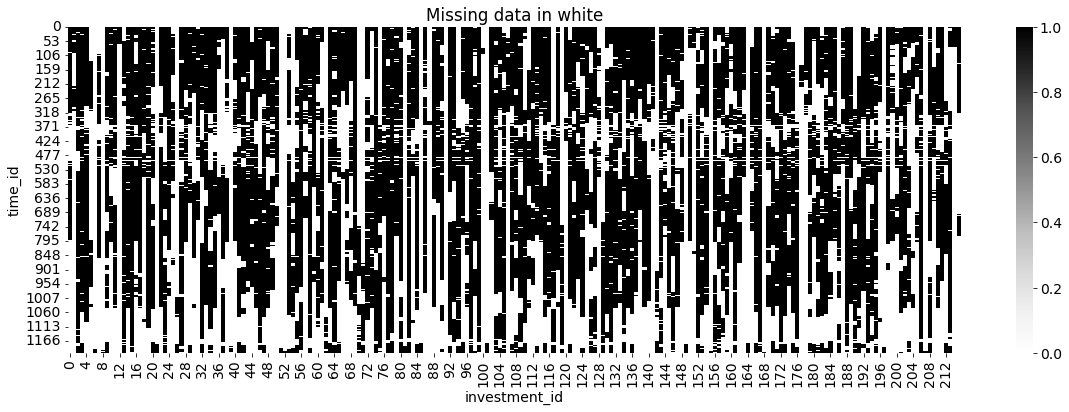

investment_id      7         22        35        51        59    71    72    \
time_id                                                                       
0             -1.064780 -1.655260 -0.201764  0.149378  0.219835   NaN   NaN   
1             -0.372692 -1.056789  0.021895 -0.441030  0.483924   NaN   NaN   
2              0.318899  0.771912  1.413592  0.492170 -0.857035   NaN   NaN   
3             -0.711446  1.012446  0.117152 -0.770784 -0.006966   NaN   NaN   
4             -1.581650  1.468560  0.124176  0.111177  0.135313   NaN   NaN   

investment_id  83    85        109   ...      3656  3662      3664  3670  \
time_id                              ...                                   
0               NaN   NaN -0.451835  ...  0.107064   NaN  0.143133   NaN   
1               NaN   NaN -0.613596  ... -0.097533   NaN  0.747815   NaN   
2               NaN   NaN -0.184009  ... -0.441403   NaN -1.657633   NaN   
3               NaN   NaN -0.974300  ...  2.598462   NaN  0.357115   NaN   
4               NaN   NaN -0.928512  ...  0.063940   NaN  0.393680   NaN   

investment_id      3689      3700  3701      3743      3755      3767  
time_id                                                                
0              0.243853 -0.196321   NaN  0.974340 -0.040060       NaN  
1             -0.326396 -0.632933   NaN  1.276502  0.838320  1.318857  
2              0.706717 -0.495233   NaN  1.406182  0.309201 -0.040981  
3             -0.360067  0.267999   NaN -0.728487  0.882041  0.386379  
4             -0.853168  0.444686   NaN  1.313428 -0.290220 -1.476258  

[5 rows x 216 columns]

In [13]:
df_dropped_inv = df_new.drop(df_time_drop.columns,axis=1)
# print(len(df_dropped_inv.columns)+len(df_time_drop.columns), len(df_new.columns))

# df_dropped_inv = df_dropped_inv.dropna(thresh=len(df_time_drop)-N_missing, axis=1)#len(df_time_drop)-500

plt.figure(figsize=(20,6))
ax = sns.heatmap(1-np.isnan(df_dropped_inv.to_numpy()), cmap="Greys")

plt.title('Missing data in white')
plt.xlabel('investment_id')
plt.ylabel('time_id')
# plt.xticks(np.linspace(0,212,53),df_dropped_inv.columns[4:-1:4])

plt.show()

df_dropped_inv.head()

## Calculate the Pearson correlation between investments over time, pairwise for all remaining investment IDs
corr automatically ignores time_ids that are not common to both investments

In [14]:
corr = df_time_drop.corr(method='pearson').values
#corr = df_new.corr(method='pearson', min_periods=10).values

print('Number of NaN in correlation matrix is', sum(sum(np.isnan(corr))))

Number of NaN in correlation matrix is 0


## Plot correlations between investments

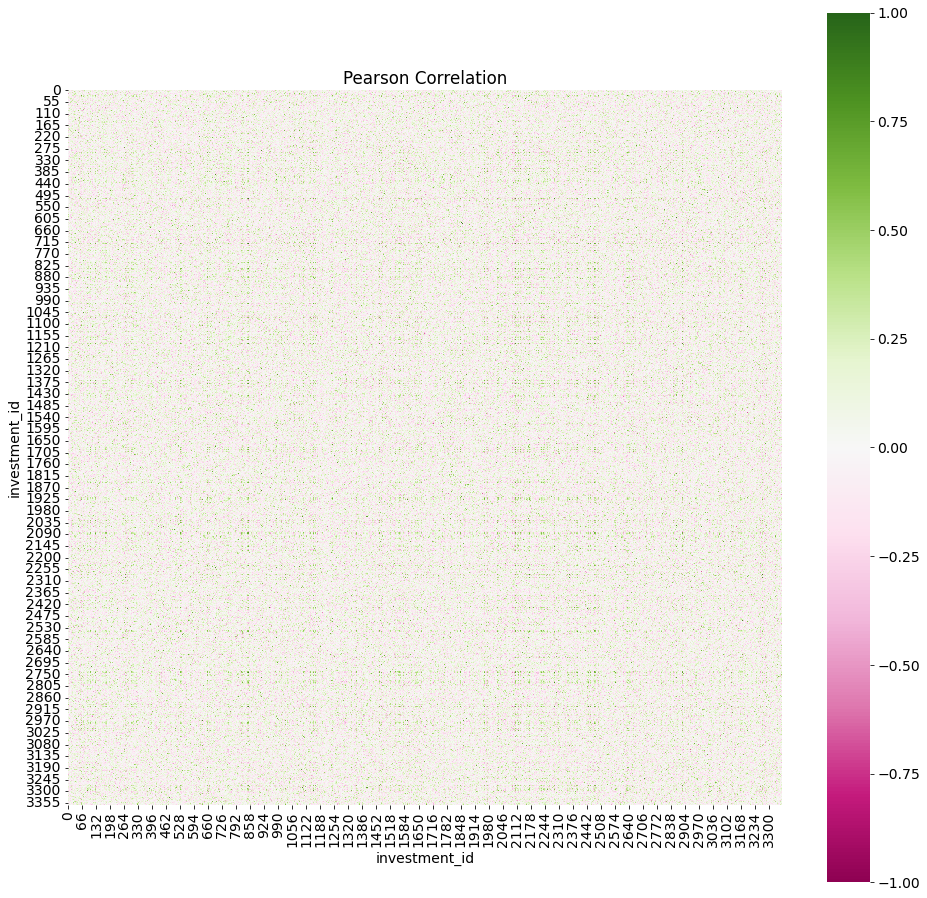

In [15]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(corr,cmap="PiYG", vmin=-1, vmax=1)

plt.title('Pearson Correlation')
plt.xlabel('investment_id')
plt.ylabel('investment_id')
ax.set_aspect('equal', adjustable='box')
plt.savefig('./no_clustering.png')

plt.show()

# Clustering of investments
## Calculate the "distance" between two investments determined by the pairwise correlation

In [16]:
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')

## The number of clusters vs distance threshold is changed

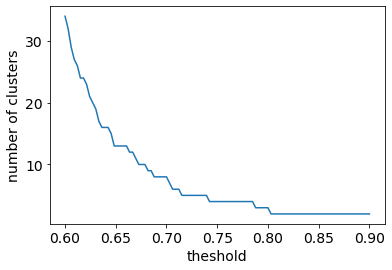

In [17]:
num_clusters = []
T =  np.linspace(0.6,0.9,100)
for t in T:
    idx = spc.fcluster(linkage, t * pdist.max(), 'distance')
    num_clusters.append(max(idx))
#     plt.hist(idx, bins = max(idx),edgecolor="k")
#     plt.xlabel('frequency')
#     plt.xlabel('number of time_ids')
#     plt.show()

plt.plot(T,num_clusters)
plt.ylabel('number of clusters')
plt.xlabel('theshold')
plt.show()
         

## For a specific distance threshold visulize clusters

Bin 	 Freq
1 	 1758
2 	 445
3 	 1160
[]


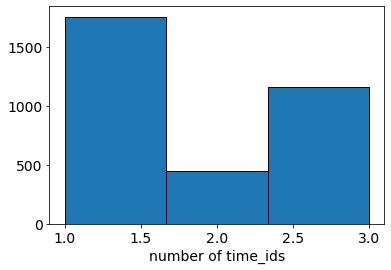

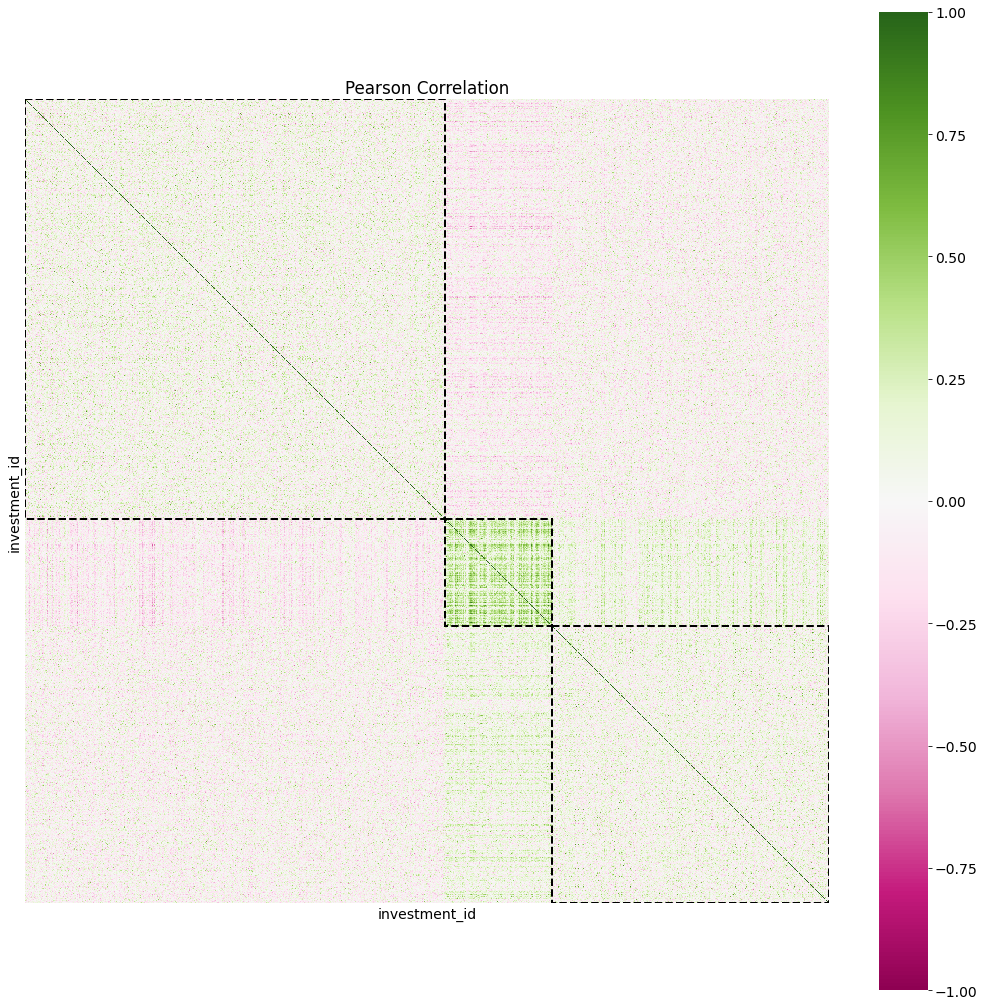

In [18]:
#print(min(idx),max(idx))
#print(idx)

t = 0.8 #0.65,0.675,0.69,0.725,0.75,0.8

idx = spc.fcluster(linkage, t * pdist.max(), 'distance')

plt.hist(idx, bins = max(idx),edgecolor="k")
plt.xlabel('frequency')
plt.xlabel('number of time_ids')

# print('number of clusters', max(idx))
_ , freq = np.unique(idx, return_counts=True)
print("Bin \t Freq")
for i in range(len(freq)):
    print(i+1,'\t', freq[i])
# print(sum(freq),len(df_time_drop.columns))
# print(idx)
# print(df_time_drop.columns.values)

columns = [df_time_drop.columns.tolist()[i] for i in list((np.argsort(idx)))]
df_sorted = df_time_drop.reindex(columns, axis=1)

from matplotlib.patches import Rectangle

plt.figure(figsize=(18,18))
ax = sns.heatmap(df_sorted.corr().values,cmap="PiYG", vmin=-1, vmax=1)

mean_corr = []
x_min=0
y_min=0
for i in range(len(freq)):
    width = freq[i]
    height = freq[i]
    ax.add_patch(Rectangle((x_min, y_min),
                            width, height,
                            fc='none',
                            color ='black',
                            linewidth = 2,
                            linestyle="dashed"))
    x_min+= freq[i]
    y_min+= freq[i]

print(mean_corr)

plt.title('Pearson Correlation')
plt.xlabel('investment_id')
plt.ylabel('investment_id')
#plt.yticks(np.linspace(0,3354,39), df_sorted.columns[86::86])
plt.xticks([])
plt.yticks([])

ax.set_aspect('equal', adjustable='box')
plt.savefig('./t'+str(t)+'_clustering.png')
plt.show()


## Dataframe with cluster info
Investments that were dropped earlier are placed in the '0' cluster

In [19]:
df_cluster = pd.DataFrame(list(zip(df_time_drop.columns, idx)), columns=['investment_id', 'cluster_id'])

df_dummy = pd.DataFrame(list(zip(df_dropped_inv.columns, np.zeros(len(df_dropped_inv.columns)))), columns=['investment_id', 'cluster_id'])
                        
df_cluster = df_cluster.merge(df_dummy,how='outer')

df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3579 entries, 0 to 3578
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   investment_id  3579 non-null   int64  
 1   cluster_id     3579 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 83.9 KB


In [20]:
# df_new_alt = df_train.drop(['investment_id','time_id','row_id'],axis = 1)
# df_new_alt.head()

In [21]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_new_alt)
# visualizer.show()


# Under construction
## Feature selection

Only to be used if traget = 'f_?" and not if target = 'target'

In [22]:
# inv_id = random.choice(df_train.investment_id.unique())
# df = df_train.loc[df_train.investment_id==inv_id]

# X_train = df.drop(['investment_id','time_id','target','row_id'],axis=1)
# # X_train.head()

# y_train = df['target']
# # y_train.head()

In [23]:
# from sklearn.linear_model import LinearRegression


# model=LinearRegression()
# model.fit(X_train,y_train)
# importance=model.coef_
# # importance=np.sort(importance)
# #plotting the features and their score in ascending order
# # sns.set_style("darkgrid")
# plt.bar([i for i in range (len(importance))],importance)

# plt.show()

# print(importance.argmax(axis=0))
# plt.plot(y_train)
# plt.plot(X_train['f_'+str(importance.argmax(axis=0))])
# plt.show()
                 
# print(np.corrcoef(X_train['f_'+str(importance.argmax(axis=0))],y_train))

In [24]:

# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# # fit the model
# model.fit(X_train, y_train)
# # get importance
# importance = model.feature_importances_
# # importance=np.sort(importance)
# # summarize feature importance
# # for i,v in enumerate(importance):
# #     print('Feature: {}, Score: {}'.format(i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

# print(importance.argmax(axis=0))
# plt.plot(y_train)
# plt.plot(X_train['f_'+str(importance.argmax(axis=0))])
# plt.show()
# print(np.corrcoef(X_train['f_'+str(importance.argmax(axis=0))],y_train))

# print(importance.argmax(axis=0))